<a href="https://colab.research.google.com/github/Antique-1/deep-running-project/blob/main/img_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
import pandas as pd
from tabulate import tabulate

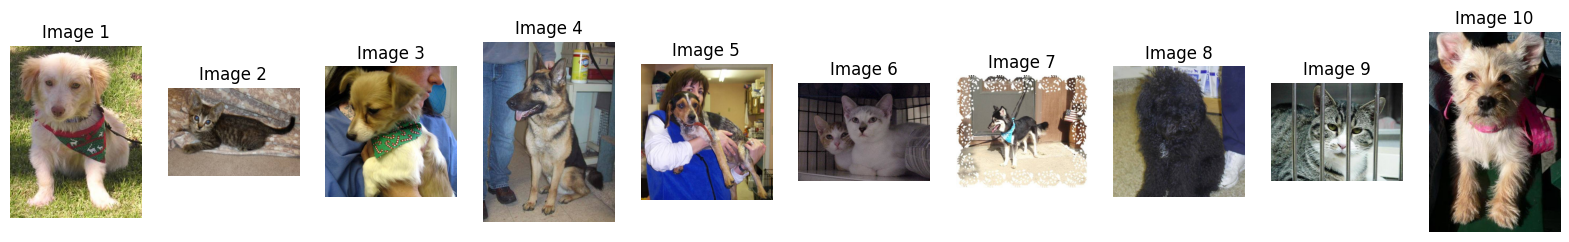

In [27]:
image_folder = '/content/drive/MyDrive/img_data' # 이미지 폴더 경로
image_files = os.listdir(image_folder)  # 이미지 파일 리스트 불러오기
random_images = random.sample(image_files, 10) # 랜덤으로 10개의 이미지 파일을 선택

fig, axes = plt.subplots(1, 10, figsize=(20, 20)) # 10개 이미지를 1x5 그리드로 시각화

for i, img_file in enumerate(random_images): # 인덱스 i만큼 순차적으로 처리. random_images 파일들을 순차적으로 img_file에 불러옴
    img_path = os.path.join(image_folder, img_file) # 폴더와 이미지 경로 조합해서 path에 전체경로 저장
    img = Image.open(img_path) # path에 저장된 경로의 이미지 열기

    axes[i].imshow(img) # 이미지 시각화
    axes[i].axis('off') # 축 숨기기
    axes[i].set_title(f'Image {i+1}') # f_string 함수 이용해 타이틀 짓기. image i+1


plt.show()

# 데이터 정보 출력

In [28]:
image_folder = '/content/drive/MyDrive/img_data'

cat_images = [f for f in os.listdir(image_folder) if 'cat' in f.lower() and f.endswith(('jpg'))] # jpg 형태의 이미지 파일중 cat이 포함된 이미지 리스트를 필터링
dog_images = [f for f in os.listdir(image_folder) if 'dog' in f.lower() and f.endswith(('jpg'))]  #jpg 형태의 이미지 파일중 dog가 포함된 이미지 리스트를 필터링

cat_count = len(cat_images) # 고양이, 개 len 이용해 이미지 개수 계산
dog_count = len(dog_images)

total_count = cat_count + dog_count # 전체 수

cat_ratio = cat_count / total_count * 100 # 고양이, 개의 평균 구하기.
dog_ratio = dog_count / total_count * 100

cat_sizes = [os.path.getsize(os.path.join(image_folder, f)) for f in cat_images] # getsize 이용해 각 용량을 구하는 식
dog_sizes = [os.path.getsize(os.path.join(image_folder, f)) for f in dog_images]

cat_avg_size = sum(cat_sizes) / len(cat_sizes) / (1024 * 1024) if cat_sizes else 0 # 고양이, 개의 이미지 크기를 MB(1024 * 1024 KB)로 변환
dog_avg_size = sum(dog_sizes) / len(dog_sizes) / (1024 * 1024) if dog_sizes else 0

print(f"Total number of images: {total_count}") # 결과 출력
print(f"Number of cat images: {cat_count} ({cat_ratio:.2f}%)")
print(f"Number of dog images: {dog_count} ({dog_ratio:.2f}%)")
print(f"Average size of cat images: {cat_avg_size:.2f} MB")
print(f"Average size of dog images: {dog_avg_size:.2f} MB")

total_size = sum(cat_sizes) + sum(dog_sizes) # 합산
total_size_mb = total_size / (1024 * 1024)

data = {
    "Category": ["Cat", "Dog", "Total"], # 데이터 셋을 저장
    "Count": [cat_count, dog_count, total_count],
    "Percentage": [f"{cat_ratio:.2f}%", f"{dog_ratio:.2f}%", "100.00%"],
    "Average Size (MB)": [f"{cat_avg_size:.2f}", f"{dog_avg_size:.2f}", f"{(total_size_mb / total_count) if total_count else 0:.2f}"],
    "Total Size (MB)": [f"{sum(cat_sizes) / (1024 * 1024):.2f}", f"{sum(dog_sizes) / (1024 * 1024):.2f}", f"{total_size_mb:.2f}"]
}

df = pd.DataFrame(data) # pandas 라이브러리를 이용해 dataframe 형성

print(tabulate(df, headers="keys", tablefmt="pretty", showindex=False)) # 표 출력

Total number of images: 145
Number of cat images: 65 (44.83%)
Number of dog images: 80 (55.17%)
Average size of cat images: 0.02 MB
Average size of dog images: 0.02 MB
+----------+-------+------------+-------------------+-----------------+
| Category | Count | Percentage | Average Size (MB) | Total Size (MB) |
+----------+-------+------------+-------------------+-----------------+
|   Cat    |  65   |   44.83%   |       0.02        |      1.26       |
|   Dog    |  80   |   55.17%   |       0.02        |      1.95       |
|  Total   |  145  |  100.00%   |       0.02        |      3.21       |
+----------+-------+------------+-------------------+-----------------+
